In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
tumour = './data/yes'
non_tumour = './data/no'

In [3]:
tumour_list = os.listdir(tumour)

In [4]:
def load_images(image_path):
    img = cv2.imread(image_path)
    return img
def plot_images(image_array):
    cv2.imshow('image',image_array)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
scan = load_images((tumour + '/' + 'Y1.jpg'))

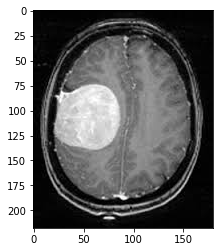

In [8]:
#plot_images(scan)
plt.imshow(scan)

In [7]:
scan.shape

(218, 180, 3)

In [9]:
gray = cv2.cvtColor(scan,cv2.COLOR_BGR2GRAY)

In [10]:
T,thres = cv2.threshold(gray,155,255,cv2.THRESH_BINARY)

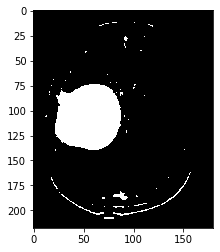

In [12]:
# plot_images(thres)
plt.imshow(thres,cmap = 'gray')

In [13]:
T, thresinv = cv2.threshold(gray,155,255,cv2.THRESH_BINARY_INV)

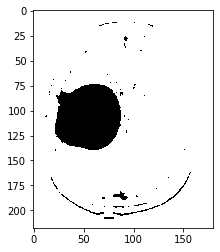

In [14]:
# plot_images(thresinv)
plt.imshow(thresinv,cmap = 'gray')

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,5))
closed = cv2.morphologyEx(thres,cv2.MORPH_CLOSE, kernel)

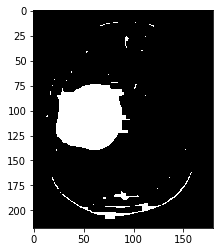

In [17]:
# plot_images(closed)
plt.imshow(closed,cmap = 'gray')

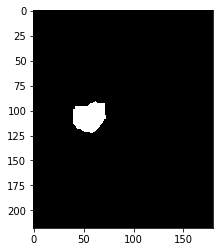

In [18]:
erode = cv2.erode(closed,None,iterations = 14)
dilate = cv2.dilate(erode,None,iterations = 13)
# plot_images(erode)
plt.imshow(erode, cmap = 'gray')

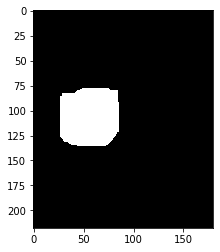

In [19]:
# plot_images(dilate)
plt.imshow(dilate, cmap = 'gray')

In [20]:
ret, mask = cv2.threshold(dilate,155,255,cv2.THRESH_BINARY)
'''
Applying bitwise_and operation on image and mask generated

'''
final = cv2.bitwise_and(scan,scan,mask = mask)

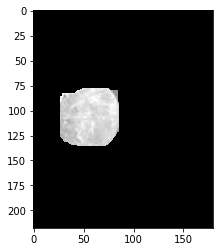

In [21]:
# plot_images(final)
plt.imshow(final, cmap = 'gray')

In [22]:
def auto_canny(image, sigma = 0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma)*v))
    upper = int(min(255, (1.0 - sigma)*v))
    edged = cv2.Canny(image,lower,upper)
    return edged

In [23]:
canny = auto_canny(dilate)

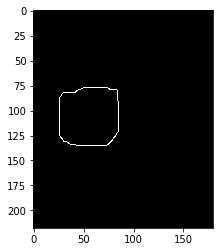

In [24]:
# plot_images(canny)
plt.imshow(canny, cmap = 'gray')

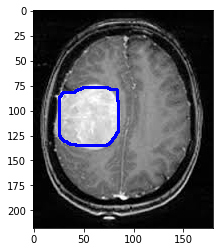

In [25]:
cnts, _ = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(scan,cnts,-1,(0,0,255),2)
# plot_images(scan)
plt.imshow(scan,cmap = 'gray')

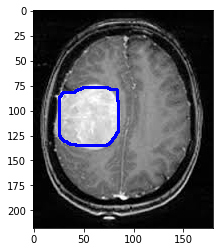

In [27]:
plt.imshow(scan,cmap = 'gray')